##  Thinking about model validation

#### Model validation the wrong way

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [17]:
model.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [22]:
y_model = model.predict(X)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

#### Model validation the right way

In [31]:
from sklearn.cross_validation import train_test_split

# split the daata ith 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                 train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.90666666666666662

In [34]:
# Two fold cross-validation, made by hand

y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.95999999999999996, 0.90666666666666662)

In [44]:
# Automatic five-fold cross validation

from sklearn.cross_validation import cross_val_score
cross_val_score(model, X, y, cv=5)

array([ 0.96666667,  0.96666667,  0.93333333,  0.93333333,  1.        ])

In [62]:
# Leave-one-out cross validation

from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
scores

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [65]:
scores.mean()

0.95999999999999996

### Validatioin curves in sklearn

In [188]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [201]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

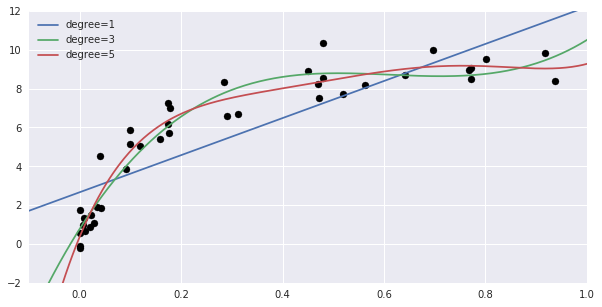

In [215]:
X, y = make_data(40)
plt.figure(figsize=(10, 5))

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test, y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

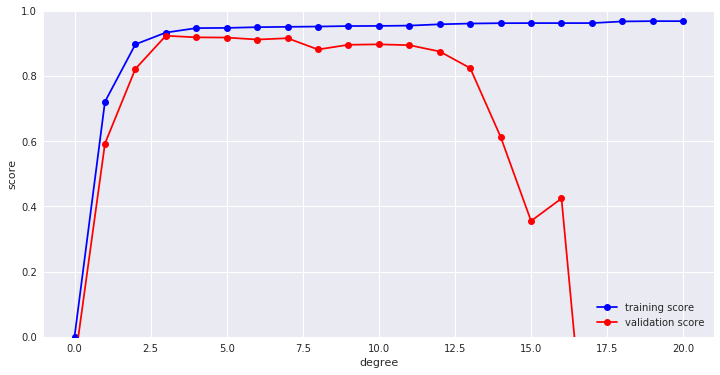

In [222]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree',
                                          degree, cv=7)

plt.figure(figsize=(12, 6))
plt.plot(degree, np.median(train_score, 1), marker='o', 
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), marker='o',
         color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

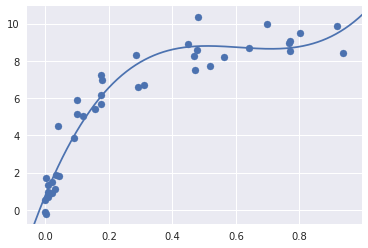

In [229]:
plt.scatter(X.ravel(), y); # plt.scatter(X, y) would do the same
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

#### Increasing the size of the dataset

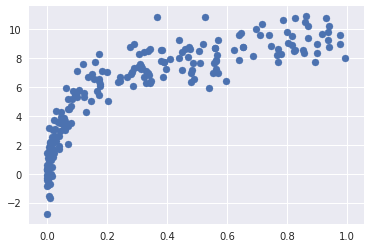

In [233]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

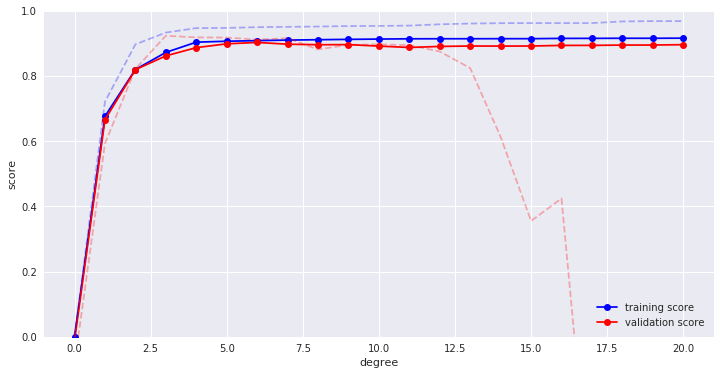

In [256]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',
                                            degree, cv=7)
plt.figure(figsize=(12, 6))
plt.plot(degree, np.median(train_score2, 1), color='blue',
         marker='o', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red',
         marker='o', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue',
         alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red',
         alpha=0.3, linestyle='dashed')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

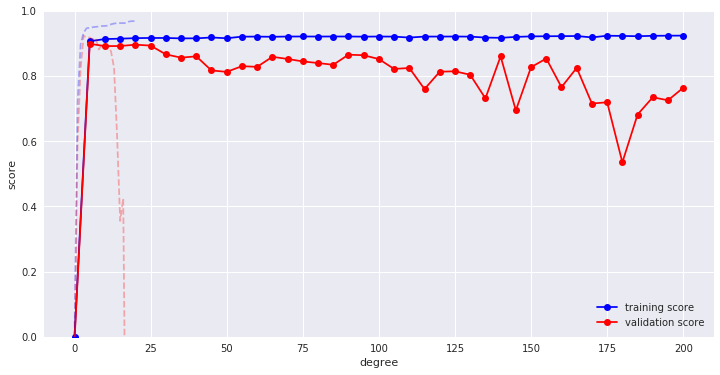

In [255]:
degree = np.arange(21)
degree2 = np.arange(0, 201, 5)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree',
                                            degree2, cv=7)
plt.figure(figsize=(12, 6))
plt.plot(degree2, np.median(train_score2, 1), color='blue',
         marker='o', label='training score')
plt.plot(degree2, np.median(val_score2, 1), color='red',
         marker='o', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue',
         alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red',
         alpha=0.3, linestyle='dashed')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

### Learning curves in sklearn

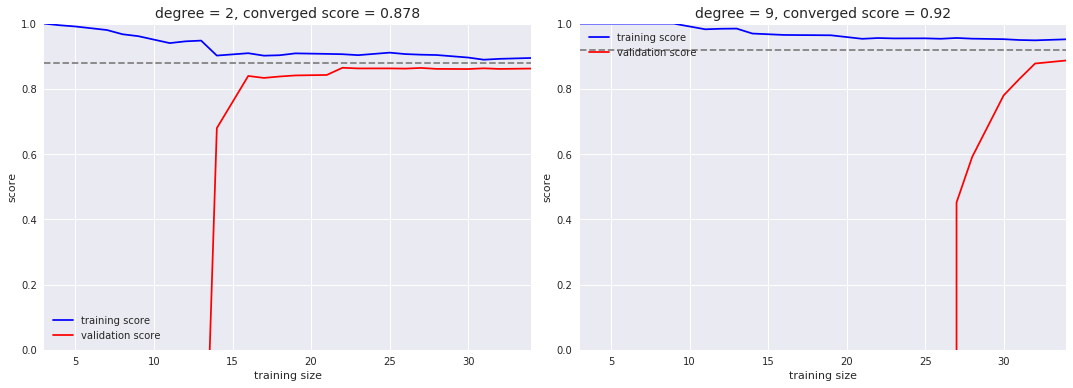

In [270]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.1, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    converged_score = np.mean([train_lc[-1], val_lc[-1]])
    ax[i].hlines(converged_score, N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree) + 
                    ', converged score = ' + format(round(converged_score, 3)),
                    size=14)
    ax[i].legend(loc='best')


## Validation in Practice: grid search

In [276]:
from sklearn.grid_search import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [280]:
grid.fit(X, y);

In [283]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [285]:
grid.best_score_

0.8956938691106144

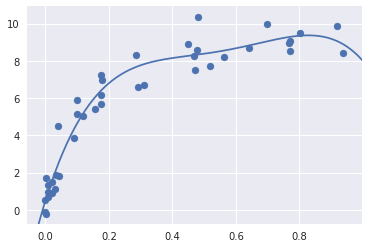

In [288]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);